## 构建文本对话系统

---

### 介绍

要说到自然语言处理最为热门的应用，莫过于对话系统了，工业界和学术界都十分关注聊天系统的研发，一方面是由于聊天技术应用能够极大地缩减人力资源，落地场景多样；另一方面，聊天技术代表了自然语言处理的最高水平之一，是许多科学家向往突破的难题。本实验将为大家介绍主要对话系统技术以及通过案例展示一个简单问答系统的搭建过程。

#### 知识点

- 对话系统的基本类型及应用
- 对话系统的关键技术
- 基于检索的百科问答系统实例

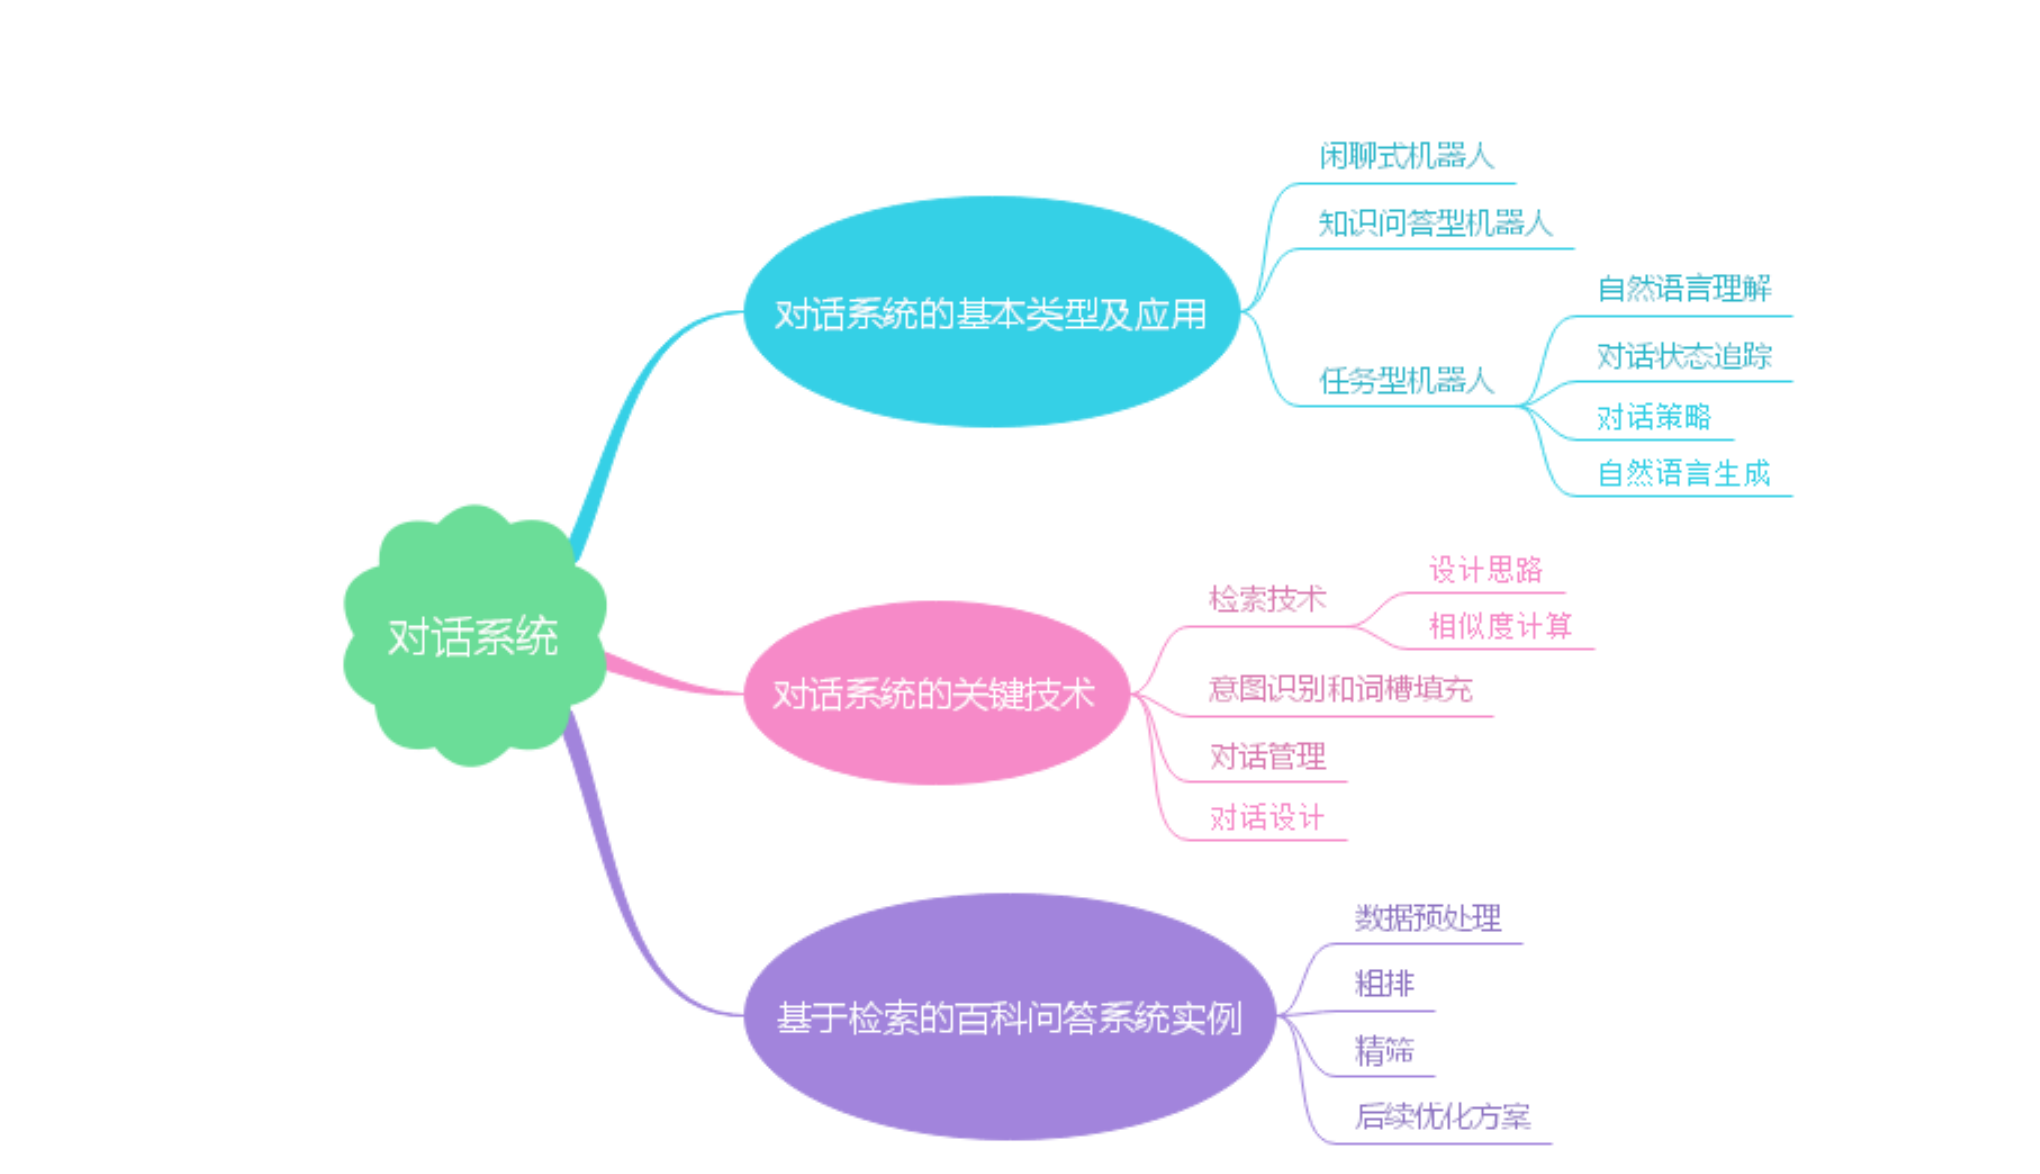

### 对话系统的基本类型及应用

根据聊天系统目的功用的不同，可分成三大类型：

- 闲聊式机器人：较有代表性的有微软小冰、微软小娜、苹果的 Siri、小 i 机器人等，主要以娱乐为目的。
- 知识问答型机器人：知识问答型系统，比如 Watson 系统最早在 2011 年的问答节目 Jeopardy 上击败了所有人类选手，赢得百万美金的奖金（当然，Watson 不止有知识问答的功能）。
- 任务型机器人：以完成某一领域的具体任务为导向，在工业界上应用较广泛，如订票系统、订餐系统等。

如下图所示为各种类型的聊天机器人：

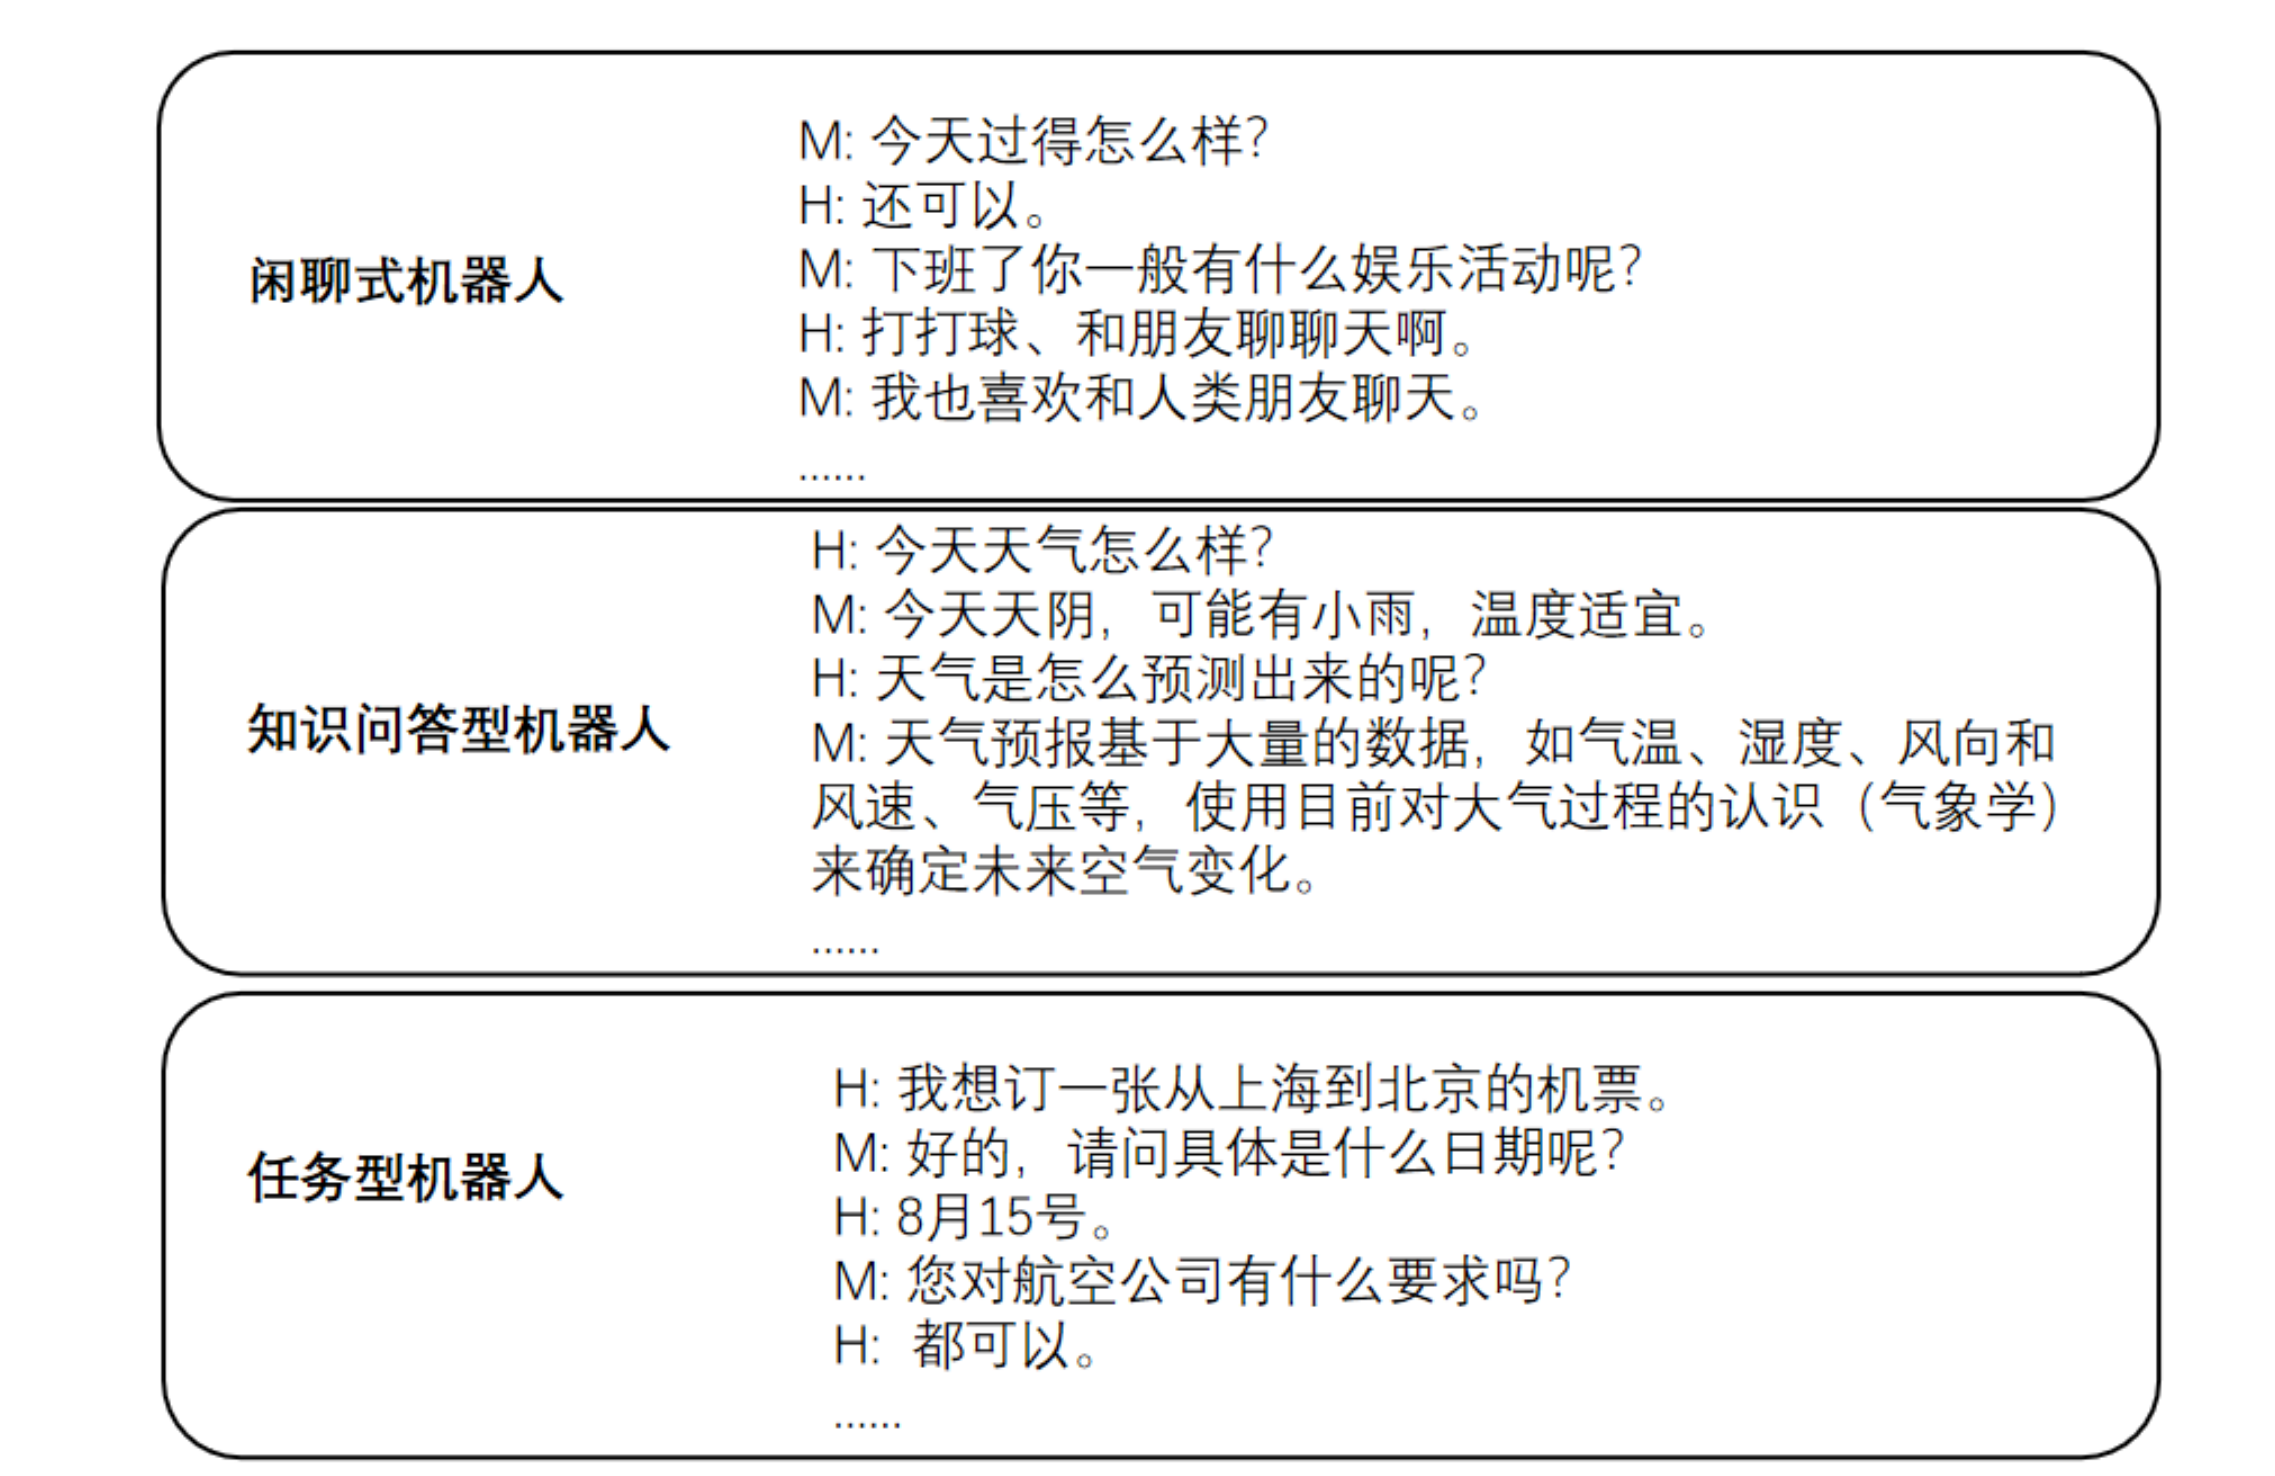

#### 闲聊式机器人

闲聊式机器人所针对的场景主要是日常生活对话，诸如此类的对话数据在互联网日益发展的今天已经十分庞大，电影对白、微博上的评论互动、贴吧上的留言回复等都可以作为聊天语料。另外，一些图片、表情、动图、视频、外部链接等都可以作为聊天语料，以丰富用户的视听体验。

其中的技术实现可分为两大类：基于检索和基于生成。前者的核心是维护一个常见的对话集合，从中获取与当前用户输入语句最相似的内容并且继而匹配回复，但是这种方式得到的回复会显得比较机械化，均是语料库存中的固有语句。而后者基于编码解码的结构，对用户输入语句进行编码后的信息再解码出对应的回复，灵活度高，但需要很庞大的训练数据，否则生成效果不佳。

至今，还未能有一款机器人能做到“人机难辨”的境界。作为用户，我们很容易就能感知到对面的闲聊系统是没有记忆、没有感情、没有个性的机器。比如，系统不一定记得之前跟它聊过什么，和每个人聊天都是同样模式，当然更不存在所谓的感情与同理心。

所以在目前阶段，闲聊型机器人往往被应用于娱乐，作为某种产品（比如手机应用）的附属品出现，不涉及真正严肃的应用。其实除了其娱乐性质以外，一个更“聪明”的闲聊系统有很多实际用途，比如陪伴孤寡老人、留守儿童以及一些有特殊需要的人群，目前的闲聊机器人还未达到陪伴的水准。

#### 知识问答型机器人

不同于闲聊，知识问答型机器人所面对的场景更专业、更精细化，比如附近地标问询、儿童早教机、法律信息咨询、医院的导诊系统等。这些应用都是针对某一具体情形，解决实际问题，因此需要机器拥有相应的领域知识，在理解自然语言的基础上作相关的信息查询甚而需要有一些推理决策的过程。

那怎么使机器拥有知识？很直观地，建立数据库就行。但事实上，传统的数据库模型难以表达现实世界中错综复杂的知识点及之间联系，而且难以查询，这就引出了知识图谱（Knowledge Graph）的概念。形象地说，它由点和线组成，点代表了实体或者说概念，线代表了点与点之间的联系，当然，点和线还可以有各自的属性。

举个例子，小王和小王妈妈为两个实体，她们之间为母女关系，而这两个实体还有各自的属性，比如出生年月、爱好、居住地等。这种结构的灵活性、可扩展性都很高，能够有效表征很多领域中的知识及其间关系。建立知识图谱的过程其实就是为机器构建“大脑”的过程，包括了模式设计、实体挖掘、关系抽取、知识融合等步骤。

至于推理，即使对于人脑而言，也属于一种高级智能，于机器而言，至今也还没有工业化成熟度很高的可以实现推理的框架。大部分基于知识图谱的问答主要是应用查询获取相关知识或者预先人工定义好一些推理规则进行知识补全，与人脑的推理相差甚远。事实上，人脑是如何进行推理的，记忆、知识、情感、经验等又会对推理产生什么样的影响，认知神经科学家也还在探索当中。或许有一天等这些谜底解开了，机器才有可能掌握真正的推理。

#### 任务型聊天机器人

任务型聊天机器人以帮助用户完成某项具体任务为导向，进行单轮或多轮对话。比较简单的场景，比如智能家居，机器人能理解并执行主人指令即可，无需进行多轮对话。而在一些比较复杂的场景下，比如预订餐馆、预订机票、预定电影票等，需要的关键信息较多，按照人类的用语习惯，也不太可能一言以概述，因此常常需要机器人与用户间多轮交互后才能完成任务。

对于基于任务型的多轮对话系统，一般有四大模块：

- 自然语言理解（Spoken Language Understanding，SLU）
- 对话状态追踪（Dialogue State Tracking，DST）
- 对话策略（Dialogue Policy Learning，DPL）
- 自然语言生成（Natural Language Generation，NLG）

整体结构如下图所示：

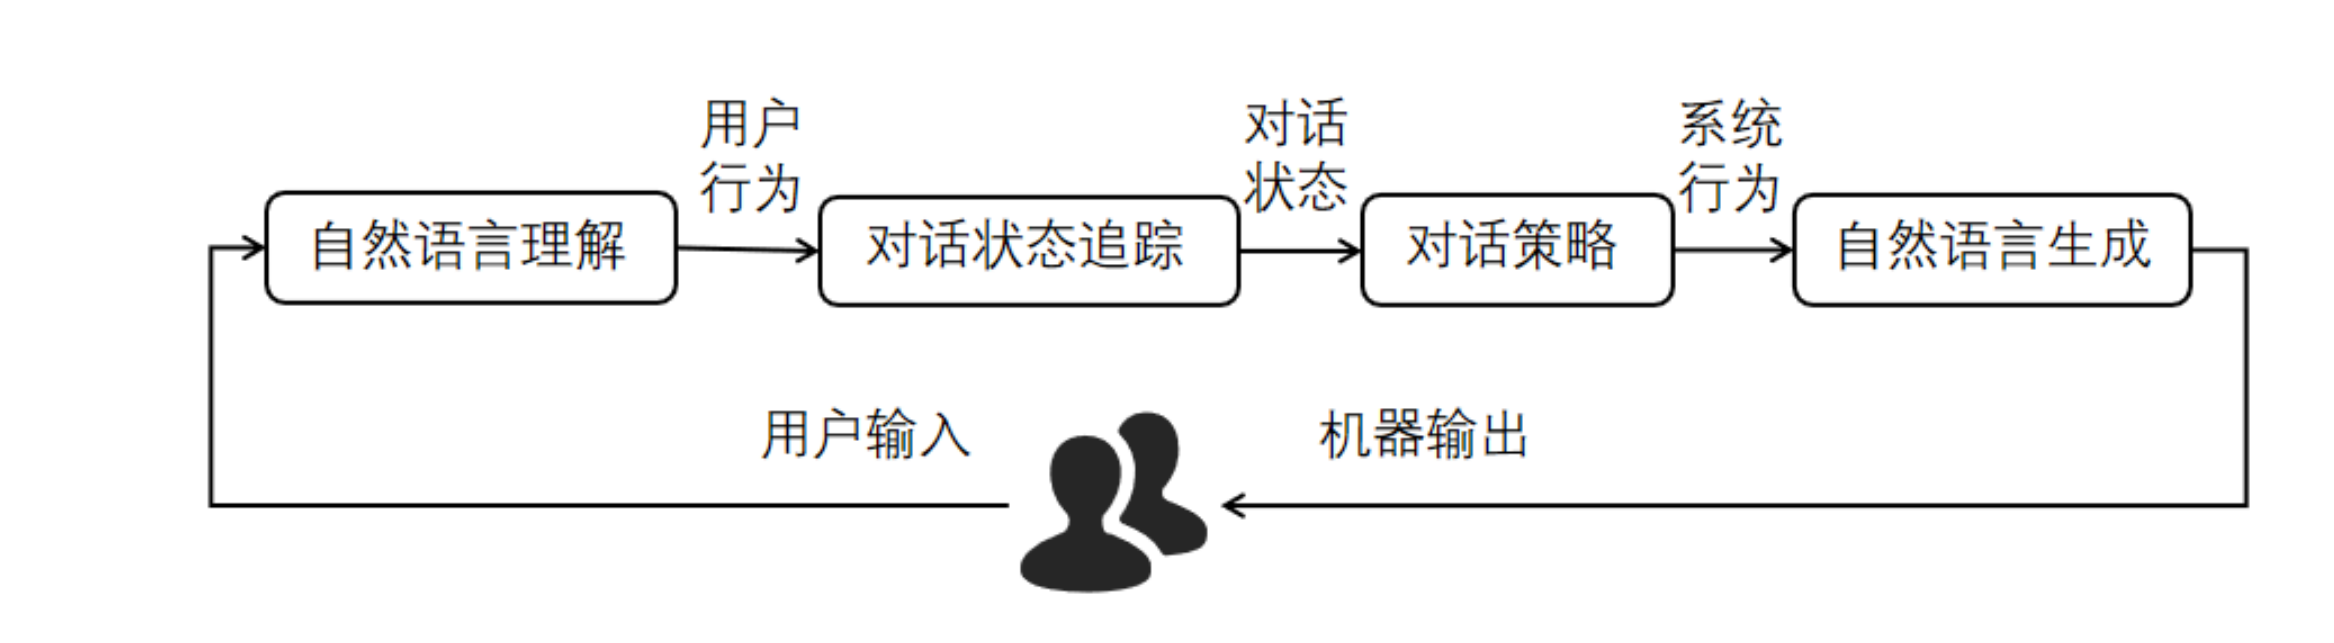

SLU 模型的目标是识别用户的意图（Intention Detection）以及词槽填充（Slot Filling）。用通俗的语言来讲，就是获取一些完成任务的关键信息，比如“我想吃西餐，价位便宜点的”这句话，其意图是“找餐厅”，词槽是“菜系”和“价格”，词槽值分别是“西餐”和“便宜”。DST 的目的是保存并更新对话状态，包括一些历史对话信息、当前的词槽填充情况、数据库查询结果等等。DP很好理解，即基于当前的对话状态及用户输入作出合适的反馈，而 NLG 则是将这个反馈转化为自然语言的过程。在具体实践中，可以把这四个模块当作单独的子任务来做，也可以用端到端的方式将四者串行，用一些深度学习、强化学习的技术实现系统搭建。

另外，我们也可以基于公开的聊天机器人平台根据个人需要搭建对话系统。比较具备代表性的平台有：百度的 AI 开放平台、海森智能的 ruyi.ai 系统、脸书的 wit.ai 平台、亚马逊的 Lex 等。这些平台实现了基本的技术构建和封装，只需要用户根据特定任务做一些较简单的诸如意图及词槽定义、相关模型选择的工作即可快速搭建聊天系统。

### 对话系统的关键技术

如上文所述，聊天系统代表了自然语言处理中的高阶任务，几乎覆盖了所有的自然语言处理技术。本小节重点讲解一些常用的关键技术，用于问答匹配的检索技术以及任务型对话里的相关模块。

#### 检索技术

基于检索技术的问答设计思想很简单，即收集问答对，机器根据用户输入查找到相似度最高的相关问题，而后将其答案返回。比如用户输入“上火的时候能不能吃荔枝？”，机器通过在现有的问答集里检索到相似度最高的问题“上火了可以吃荔枝吗？”，并且返回其正确答案“上火的时候不宜吃荔枝”。
那么，如何找到相似的问题？一般分为两种方法：

- 基于字符串的相似度匹配：用于字母语言，具体方法有编辑距离计算、杰卡德距离算法或者基于 Lucene 提供的模糊查询方法。值得一提的是，虽然中文不是由字母构成，但也可以拆分成具体的有限数量的字根（比如五笔输入法所采用的字根拆解法），并且由于汉语作为表意语言，源于图画，很多字根蕴含了非常丰富的语义内容，从这个角度来讲，基于字根的中文相似度匹配也是一种值得尝试的方法。
- 基于语义的相似度匹配：主要从词向量的角度来考虑，基于 Word2Vec 模型或者效果更好 GloVe、ELMo、Bert 等将词向量化后再进行后续运算。由于最终目的是句子间的相似度匹配，在词向量的基础上，我们还需要用一定方法表征句向量。常见的方法有将句子里的所有词向量均值平均，或者加权平均（越常见的词权重越小），比如 SIF 加权模型、词移距离模型。另外，类似于 Word2Vec 训练词向量的方法，以三个相邻的句子为一个三元组，直接训练句向量，代表模型有 Skip-Thought Vector, Quick-Thought Vectors。而在有监督的框架下，人们也尝试用多任务学习的方法，从各个不同的任务角度对同一句话进行编码，得到迁移性比较强的句向量,比如谷歌在 2018 年推出的 Universal Sentence Encoder。

有了这些文本相似度匹配的方法后，系统搭建似乎很简单，看起来只要找到那个相近的句子就行了。而实际上，假如问答集里的数据量特别大，导致匹配过程耗时太长怎么办？为了提高系统效率，人们一般用一些粗粒度的算法得到一些候选句子（Ranked phrases），比如应用倒排索引 (Inverted Index) 找到存在输入句子中至少一个单词的所有句子作为候选项，之后再用更精细化的算法从候选者里找答案。这其实类似于一些大企业招聘人才，由于求职者众多，往往根据学校背景筛选出一批候选者，再从中作全面系统的考察后找到最合适的人才，这其中难免会遗漏掉一些真正的人才，但整体而言这是比较兼顾资源耗费与准确性的方式。

#### 意图识别和词槽填充

对于用户的输入，任务型聊天系统的第一任务便是自然语言理解，一般包括意图识别和词槽填充。

所谓意图识别，即解析出说话者的目的为何，实际上就是一个文本分类问题。比如一个订餐馆的系统，对于用户输入而言，可以有咨询信息、提供信息、表示感谢、拒绝推荐等意图。在比较简单的任务中，依靠一些规则的定义便可以识别出相关意图。在场景较复杂，意图种类较多，用户输入多变的情况下，往往应用机器学习的方法预测意图。

词槽，即与意图相关的一些必要属性，我们需要从用户输入中找到这些属性值。比如“天气查询”这个意图的词槽或者说必要属性有两个：时间和地点，机器需要用户提供这两方面的信息之后才能给出准确的回答。词槽填充其实是一个序列标注任务，一般用 BIO 作为标记法，B 为词槽值的开始（Begin），I 为延续（Inside），O 为无关信息（Outside）。

应用于序列标注的概率图模型有隐马尔科夫模型（Hidden Markov Model, HMM）、最大熵马尔科夫模型（Maximum Entropy Markov Model, MEMM）、条件随机场（Conditional Random Field, CRF）。其中，虽然 CRF 训练代价大，复杂度高，但与前两者相比，特征设计灵活，考虑全局性，效果更好。另外，循环神经网络也常应用于序列标注，能够自动学习输入语句间的隐含特征，但也有可能忽略一些很明显的标注关系层面的特征。因此，很多研究者选择把将以上两类方式结合进行序列标注，以发挥各自的优势。

虽然意图识别和词槽填充看上去是两个单独的任务，但实际上两者的关联性较大，只设计一个模型同时获取这两方面的信息会有不错效果。比如，常见的设计结构有 Bi-LSTM+CRF，结合循环神经网络和条件随机场，其中序列的每一步输入经由 LSTM 层和 CRF 层后输出为标记，而序列最终输出为意图。

对于初次接触意图识别和词槽填充这两个术语的朋友而言，往往因为其“表达的专业性陌生性”而感到难以理解。简单地说，人与人之间的对话，涉及的便是两个层面，中心思想和具体细节，在双方得到这两方面信息的基础上，对话才能顺利进行。对应地，中心思想指的便是意图识别，具体细节则是词槽填充。其实所有的术语和白话文一样，都是符号，只要和生活场景联系上了，也就不难理解了。

#### 对话管理

对话管理包括对话状态追踪以及对话策略，前者相当于人脑的记忆功能，用于存储及更新所有的对话信息，后者相当于人脑的语言反馈机制，根据当前情形做出合理的动作反应，这是任务型对话系统中最关键也是最难操作的部分。同样地，这里也涉及到一系列术语，比如对话追踪、对话策略等，这里不再举例讲解，读者们可以结合生活中的对话行为去思考，相信会有更深的体会。

首先，关于对话状态追踪，需要定义对话状态的组成成分，只要是有助于对话策略的信息都可以予以追踪。一般可以概括为四大方面的信息：历史对话信息、当前用户行为、词槽填充情况、数据库查询情况。其中词槽填充情况是至关重要的信息，直接决定了对话进行的程度，比如针对“天气查询”的意图，“地点”和“时间”两个词槽都已填充，那么马上就能回复天气情况以结束对话。

然而，词槽填充并不是件简单的事，这是由于自然语言存在极大的不确定性或者说多样性。来看这样一句话：“我想吃西餐，不过好像有点油，日餐也行，如果没有的话中餐也好。”

在这句话中“西餐”、“日餐”和“中餐”均有出现，用户到底想吃什么的目的也不是很明确，那么到底要选哪一个作为词槽“菜系”的值？这似乎很难判断。所以实际上词槽值的输出不应该是某一确定的单一值，而是所有可能值的概率分布，比如输出 [0.4,0.4,0.2] 分别作为想吃西餐、日餐和中餐的概率。由于用户在对话过程中也会改变主意，此概率还会随着对话的进行产生变化。

有了对话状态后，根据一定策略产生行为的机制就叫对话策略。最直观的方式是设定一系列的规则，比如用有限自动状态机的方式实现此模块。比如要完成某一意图需要填充三个词槽 slot1、slot2 和 slot3 的信息，那么可以制定诸如此类的状态转移规则：没有 slot 被填充的时候，机器询问 slot1 的情况；slot1 被填充的情况下，机器询问 slot2 的情况；slot1, slot2 被填充的情况下，询问 slot3 的情况……总而言之，规则需要覆盖所有可能情况，以保证测试的时候不出纰漏。

所以，当场景稍微复杂点的时候，规则设计就会变得很繁琐；当有新的意图或词槽时，更改规则也非常麻烦；另一方面，从用户体验来看，机器的回馈也显得很呆板。而如果用深度学习的方法来习得机器行为，显然数据是一个很大的障碍，在多轮对话领域，数据量少、质量不高、缺少标签等都是短时间内难以解决的问题。

#### 对话设计

在任务型多轮对话任务中，一个架构完备的多轮对话体系的构建不只涉及到众多算法，还需要考虑很多业务上的细节，比如多轮对话可能的流程、有哪些意图、有哪些槽位等，因此需要对业务非常地熟悉。在这里，以槽的设计所需注意的要点为例进行说明。

刚接触多轮对话的有些朋友可能会觉得，槽的设计不是很简单嘛，把对话场景中涉及到的关键实体罗列出来不就可以了？比如做一个医疗方面的对话，那么应该就有疾病、食物、药物、症状等。事实上，槽的罗列整理是一方面，难点在于如何整理清楚槽的类型、填充方式以及槽之间的关系。

首先，槽可分为必填与非必填。比如在一个订餐的系统中，餐馆位置、菜品、人数等应该是必填槽，而顾客或者餐馆的更多其它情况并非必填槽，比如顾客性别年龄、餐馆装修风格等，这些信息对于订餐的完成并非必须。

再比如，槽又可以分为词槽与接口槽：

- 词槽：利用用户话中关键词填写的槽。
- 接口槽：利用用户画像以及其他场景信息填写的槽。

比如，在应用端已知一个在杭州登录的用户问：“明天天气怎么样？”那么机器助手可以默认问的是“杭州”的天气，这里就没有利用对话中的信息而是应用了场景信息。因此，同一个槽，可能会存在多种填槽方式，并且有优先级。比如，在应用端已知一个在杭州登录的用户问：“我后天要坐火车去上海，有票吗？”那么机器助手如何来获取出发地这个槽位的信息呢，能否直接默认为“杭州”呢？肯定不行。在这里涉及到订票这一施行动作，对准确度要求当然比天气高，因此需要进行确认：“您是从杭州出发么？”但如果是用户主动提供出发地为杭州，二次确认就会显得冗余。所以在这里，出发地信息可来源于用户主动提供的优先级高于用户默认所在地信息。

而对于槽之间的关系，可分为平级槽和依赖槽。举个例子，在订车票的场景中，需要知道用户“出发的时间”、“地点”、“目的地”、“座位种类”——这四个槽之间，没有任何依赖关系。而在旅游规划的场景中，比如去“海边”和“山里”，每一个选择都会有影响到后续对话发展（预定“海景房”还是“山景房”），也即每个槽的填写结果会影响其它槽的填写。如果错将平级槽采用依赖槽关系来管理，就会出现信息的丢失。比如 A、B、C，三者本为平级槽关系，但却将其用 A->B->C 的依赖槽关系来管理，那即便用户问句中包含填写 B、C 槽组的信息，也可能会由于 A 槽组的未填写而造成 B、C 槽组的填写失败。如果错将依赖槽采用平级槽的关系来管理，就会出现信息的冗余，比如 A、B、C三者的关系为 A、A1->B、A2->C，那即便用户将值 A1 填入槽组 A 后，却仍然需要向用户询问本不需要的 C 槽组的填写信息。

以上仅是对话设计中的一小部分工作，在真正的应用中还需要考虑横向广泛纵向深度的方面，因此想成为一个合格的算法工程师，对业务的理解必不可少。

### 基于检索的百科问答系统实例

在本小节中我们将基于一批百科问答对数据，构建一个基于检索的百科问答系统，主要的流程如下：

- 数据预处理：去除非中文，停用词以及分词等。
- 粗排：初步筛选出包含输入问题中至少某一单词或其同义词的项目作为候选项。
- 精筛：对候选项进行语义表征后再进行相似度计算，获取 topK 作为最终的输出。

首先，所具备的实验数据如下：

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 教学代码：</i>

In [ ]:
import pandas as pd
qas = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/3205/baike_qas.csv')
qas

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 动手练习:</i>

可知，数据包含三列，questions，answers，evidences，分别为问题、答案以及答案相关的证据，本项目暂时没有用到最后一列的信息。接下来对文本进行基本的预处理，包括去除停用词、去除非中文符号以及分词。

In [ ]:
import numpy as np
import jieba
import re
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3205/hit_stopwords.txt"
# 获取停用词
with open("hit_stopwords.txt", "r", encoding="utf-8") as f:
    STOPWORDS = set([line.strip() for line in f.readlines()])


def get_keyinfo(input_text):
    # 去除非中文，停用词以及分词
    output_text = "".join([w for w in jieba.lcut(
        re.sub("[^\u4e00-\u9fa5]", "", input_text)) if w not in STOPWORDS])
    return output_text

In [ ]:
# 对 qas["questions"] 中的每一个文本进行函数 get_keyinfo() 的处理
qas["questions_keyinfo"] = np.vectorize(get_keyinfo)(qas["questions"])

questions_keyinfo 所有列为预处理后的数据：

In [ ]:
qas

在粗排的步骤，我们要根据输入文本中的单词去查找出所有至少包含一个单词及其同义词的所有候选项，为了快速找到这些候选项，这里需要做两个工作：

- 预先构建一个倒排列表，即词汇为 key, 文本 index 组成的 List 为 value，这样就可以通过查表获取候选项 index。
- 构建获取同义词的功能函数。

In [ ]:
word2qids = {}  # 倒排列表，词汇为 key, 文本 index 组成的 List 为 value
for i, q in enumerate(qas["questions_keyinfo"]):
    q_cuted = jieba.lcut(q)  # 对每个文本进行分词
    for w in q_cuted:  # 遍历分词后的词汇
        if w in word2qids:
            if i not in word2qids[w]:  # 防止重复添加文本 index
                word2qids[w].append(i)
        else:
            word2qids[w] = [i]

获取同义词库：

In [ ]:
SYNONYMS = {}  # 同义词词典，能够根据某个单词获取其同义词
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3205/synonyms.txt"
with open("synonyms.txt", "r", encoding="utf-8") as fo:  # 读取同义词文本，每一行均为同义词
    lines = fo.readlines()

for line in lines:  # 遍历所有行
    words = line.strip().split(" ")  # 分词
    for i, w in enumerate(words):
        SYNONYMS[w] = words[:i] + words[i+1:]  # 获取同义词存入同义词词典

根据输入的文本获取所有相关同义词：

In [ ]:
def get_synonyms(input_text):
    final_words = []
    words = [w for w in jieba.lcut(
        re.sub("[^\u4e00-\u9fa5]", "", input_text)) if w not in STOPWORDS]  # 预处理及分词
    for w in words:
        final_words += SYNONYMS.get(w, [])  # 获取同义词
    return final_words + words  # 最后的输出也包含句子的单词本身

In [ ]:
# 例：
get_synonyms("力的单位是啥")

结合上述功能，针对某一文本粗筛出候选文本 index：

In [ ]:
def get_candidate_answer_ids(input_text):
    candidate_answer_ids = []
    for w in get_synonyms(input_text):
        candidate_answer_ids += word2qids.get(w, [])  # 所有单词及其同义词对应的文本 id
    return list(set(candidate_answer_ids))  # 去重

In [ ]:
# 例：
get_candidate_answer_ids("谁是京东老板？")

接下来，我们需要对粗筛出的候选项进行粗细化的文本表征，此实验应用平均词向量的方式表示为句向量，这时候需要用到预训练好的中文词向量，在这里推荐一个 [中文词向量语料库](https://github.com/Embedding/Chinese-Word-Vectors)，来自北京师范大学和人民大学的研究，该库包含经过数十种用各领域语料（百度百科、维基百科、人民日报 1947-2017、知乎、微博、文学、金融、古汉语等）训练的词向量，涵盖各领域，且包含多种训练设置。

进入项目主页面，下载基于百度百科语料的 300 维词向量文件 `sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5`。本次试验中，你可以直接运行以下代码，通过我们的服务器将词向量文件下载至在线环境中。

In [ ]:
from gensim.models import KeyedVectors
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3205/sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5.bz2"
wv_baike = KeyedVectors.load_word2vec_format(
    "sgns.target.word-word.dynwin5.thr10.neg5.dim300.iter5.bz2", binary=False)

下载的词向量文件为纯文本形式，加载速度很慢，因此在这里转化为二进制文件，加快加载速度。

In [ ]:
wv_baike.save("BaikeEmbedding.bin")

从二进制文件加载词向量，速度加快：

In [ ]:
WV_BAIKE = KeyedVectors.load('BaikeEmbedding.bin', mmap='r')

基于词向量模型，对输入的文本表征为句向量：

In [ ]:
def represent_texts_by_average_w2v(texts):
    # w2v_model 为词向量模型, texts 为输入的多个文本
    texts_w2v = []
    for text in texts:
        text_cuted = [w for w in jieba.lcut(
            re.sub("[^\u4e00-\u9fa5]", "", text)) if w not in STOPWORDS]  # 预处理及分词
        text_w2v = []
        for word in text_cuted:  # 遍历文本中的所有单词
            try:
                text_w2v.append(WV_BAIKE[word])  # 获取词向量
            except:
                pass
        if text_w2v:
            text_w2v = np.mean(np.array(text_w2v), axis=0)  # 词向量相加并平均
        else:
            text_w2v = np.zeros(300)
        texts_w2v.append(text_w2v)
    if not texts_w2v:
        texts_w2v = np.zeros((1, 300))
    return texts_w2v

In [ ]:
# 例 1:
represent_texts_by_average_w2v(["谁是京东老板？"])

In [ ]:
# 例 2:
represent_texts_by_average_w2v(["谁是京东老板？", "力的单位是啥"])

基于余弦相似度比较文本间的相似度：

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_texts_similarity(text, candidate_texts):
    # 文本相似度比较
    w2v_text = represent_texts_by_average_w2v(text)  # 基于词向量平均获取 text 的向量
    w2v_candidate_texts = represent_texts_by_average_w2v(
        candidate_texts)  # 基于词向量平均获取 candidate_texts 的向量
    similarities = cosine_similarity(w2v_text, w2v_candidate_texts)  # 计算余弦相似度
    return similarities[0]

获取 topK 相似度的文本作为输出：

In [ ]:
import heapq # 基于堆获取 topK


def get_topk_answers(question, k=3, threshold=0.5):
    # threshold 为输出答案的阈值
    answers = []
    candidate_answer_ids = get_candidate_answer_ids(question)  # 根据粗筛获取候选项 id
    # 根据候选项 id 获取候选项文本
    candidate_texts = qas["questions"][candidate_answer_ids]
    similarities = compute_texts_similarity(
        [question], candidate_texts)  # 计算相似度
    # 获取 topK 相似度的项目返回
    if k > len(similarities):
        k = len(similarities)
    topk_similarities = heapq.nlargest(k, similarities)  # topK 相似度
    topk_index = heapq.nlargest(
        k, range(len(similarities)), similarities.take)  # topK 相似度下标
    for i, j in zip(topk_similarities, topk_index):
        if i >= threshold:  # 只有高于所设定的阈值，才能输出
            # 返回候选回答及其置信度（相似度）
            answers.append((qas["answers"][candidate_answer_ids[j]], i))
    return answers

In [ ]:
# 例 1：
question = "乒乓起源地"
get_topk_answers(question)

In [ ]:
# 例 2：
question = "瑜伽起源地"
get_topk_answers(question)

In [ ]:
# 例 3：
question = "变形计是哪个台播出的"
get_topk_answers(question)

In [ ]:
# 例 4：
question = "谁写了匆匆"
get_topk_answers(question)

In [ ]:
# 例 5：
question = "你好吗"
get_topk_answers(question)  # 当找不到匹配项时，输出为空

至此，我们做好了一个基于检索的百科问答基准系统，并且进行了相关测试，可以看到，当问题的问法和原标准问题差异较大时，也会出现错误（如例 4），可以基于以下方面进行优化：

- 更多的文本预处理，如自定义停用词、基于词性的处理，语法分析等。
- 更多的粗筛方式，比如基于文本长度也可以粗略筛选候选项。
- 更优的文本表征方式，比如基于不同权重进行词向量平均；获取不同语料训练而得的词向量进行平均。
- 整合更多的文本相似度比较方式，比如基于模糊匹配、基于 WMD。
- 在语料库非常大的情况下，还需要提高匹配的速度，如 KD 树、HNSW等。

### 实验总结

至此为止，我们完成了入门自然语言处理的十大实验，包括文本预处理、词汇表征、文本表征等基础知识以及文本分类、问答相关的实践应用，如果你能够在具体的场景中灵活应用这些知识，说明你已经从一个小白成长为一名初级自然语言处理工程师啦。不过，道阻且长，在此课程的基础上，建议大家从以下几方面进一步提高：

- 机器学习理论，特别是集成学习。
- 概率图模型，如 HMM、CRF。
- 深度学习理论及框架，比如 TensorFlow、PyTorch。
- 经典论文及前沿论文。
- 更多的自然语言处理任务，比如机器翻译、文本生成等。

最后，是一份整理好的自然语言处理学习资料，供参考学习：

- 在线课程
    - [斯坦福 CS224d](http://cs224d.stanford.edu/syllabus.html)：自然语言处理的深度学习更高级的机器学习算法、深度学习和 NLP 的神经网络架构。
    - Coursera：[自然语言处理简介](https://www.coursera.org/learn/natural-language-processing)，由密西根大学提供的 NLP 课程。
- 书籍
    - [言语和语言处理](https://web.stanford.edu/~jurafsky/slp3/)（Daniel Jurafsky 和 James H. Martin）经典的 NLP 教科书，涵盖了所有 NLP 的基础知识。
    - [统计自然语言处理的基础](https://nlp.stanford.edu/fsnlp/)（Chris Manning 和 HinrichSchütze）更高级的统计 NLP 方法。
- 博客
    - [自然语言处理博客（HalDaumé）](https://nlpers.blogspot.com/)
    - [Google 研究博客](https://research.googleblog.com/)
    - [语言日志博客（Mark Liberman）](http://languagelog.ldc.upenn.edu/nll/)
    - [苏剑林博客](https://spaces.ac.cn/archives/4521)
- 论文
    - [国际计算语言学协会](http://aclanthology.info/)（ACL）期刊选集。
    - [此网站](https://paperswithcode.com/area/natural-language-processing) 总结了所在 NLP 各个任务目前的最前沿论文以及相应的代码， 
- 汇总
    - NLP 各方面：https://github.com/fighting41love/funNLP
    - NLP 开源项目：https://github.com/yongzhuo/nlp_xiaojiang

<hr><div style="color: #999; font-size: 12px;"><i class="fa fa-copyright" aria-hidden="true"> 本课程内容版权归蓝桥云课所有，禁止转载、下载及非法传播。</i></div>